Madison Brady
Ph 20 Set 3

In [2]:
# Import the necessary packages.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def spring_motion(h, x0, v0, Tmax):
    '''Generate a list of t, x, and v which describe the stepwise
    explicit Euler approximations of a spring's motion.  
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        t_list: A list of values of t associated with the other returned values.
        x_list: A list of x-values derived by the explicit Euler's method
        v_list: A list of v-values derived by the explicit Euler's method
    '''
    
    # Generate a list of t's given h and Tmax.
    t_list = np.arange(0, Tmax, h)
    
    # Create numpy arrays to store the lists in.
    n_iter = len(t_list)
    x_list = np.zeros(n_iter)
    v_list = np.zeros(n_iter)
    
    # Begin our iteration at (x0, v0).
    current_x = x0
    current_v = v0
    
    # For each step, use Euler's explicit formula to calculate
    # the new x and v.  Store these in a list.
    for i in range(n_iter):
        x_list[i] = current_x
        v_list[i] = current_v
        
        current_x = x_list[i] + h * v_list[i]
        current_v = v_list[i] - h * x_list[i]
    
    # Return the lists of t, x, and v.
    return t_list, x_list, v_list

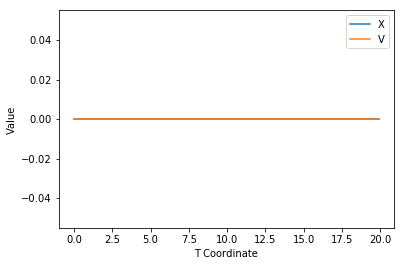

In [5]:
# Generate a list of t, x, and v for a spring with no initial displacement
# or velocity.
t_list, x_list, v_list  = spring_motion(0.1, 0, 0, 20)

# Graph the t, x, and v.  Label the plot.
plt.plot(t_list, x_list, label="X")
plt.plot(t_list, v_list, label="V")
plt.legend()
plt.xlabel("T Coordinate")
plt.ylabel("Value")
plt.savefig("v0x0numspring")
plt.show()

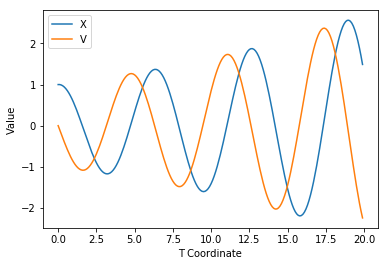

In [81]:
# Generate a list of t, x, and v for a spring with an initial displacement
# of 1 but no initial velocity.
t_list, x_list, v_list  = spring_motion(0.1, 1, 0, 20)

# Graph the t, x, and v.  Label the plot.
plt.plot(t_list, x_list, label="X")
plt.plot(t_list, v_list, label="V")
plt.legend()
plt.xlabel("T Coordinate")
plt.ylabel("Value")
plt.savefig("v0x1numspring")
plt.show()

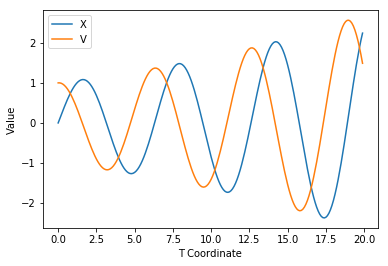

In [84]:
# Generate a list of t, x, and v for a spring with no initial displacement
# and an initial velocity of 1.
t_list, x_list, v_list  = spring_motion(0.1, 0, 1, 20)
plt.plot(t_list, x_list, label="X")
plt.plot(t_list, v_list, label="V")
plt.legend()
plt.xlabel("T Coordinate")
plt.ylabel("Value")
plt.savefig("v1x0numspring")
plt.show()

In [58]:
def analytic_spring_motion(h, x0, v0, Tmax):
    
    '''Generate a list of t, x, and v which describe the analytically 
    derived motion of a spring.  
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        t_list: A list of values of t associated with the other returned values.
        x_list: A list of x-values derived analytically.
        v_list: A list of v-values derived analytically.
    '''
    
    # Generate a range of t's.
    t_list = np.arange(0, Tmax, h)
    
    # Calculate the list of x's and v's.
    x_list = x0 * np.cos(t_list) + v0 * np.sin(t_list)
    v_list = -x0 * np.sin(t_list) + v0 * np.cos(t_list)

    # Return a list of t, x, and v.
    return t_list, x_list, v_list

In [60]:
def num_anal_err(h, x0, v0, Tmax):
    '''Generate a list of t, x, and v which describe the stepwise
    error of the explicit approximation of a spring's motion.  
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        t_list: A list of values of t associated with the other returned values.
        x_err: A list of values corresponding to the explicit method's error on x.
        v_err: A list of values corresponding to the explicit method's error on v.
    '''
    
    # Generate the analytic and spring solutions.
    t_list, x_list, v_list  = spring_motion(h, x0, v0, Tmax)
    at_list, ax_list, av_list  = analytic_spring_motion(h, x0, v0, Tmax)
    
    # Generate a list of error by finding the difference between the
    # x and v values.
    x_err = ax_list - x_list
    v_err = av_list - v_list
    
    # Return the errors.
    return t_list, x_err, v_err
    

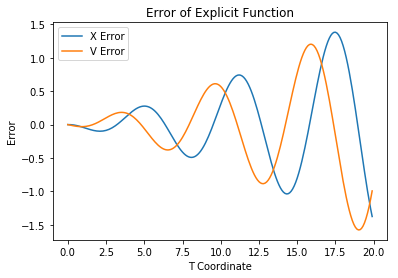

In [100]:
# Generate a list of the error on x and v for the explicit method
# with no initial displacement and an initial velocity of 1.
t_list, x_err, v_err = num_anal_err(0.1, 0, 1, 20)

# Plot the error against time.
plt.plot(t_list, x_err, label="X Error")
plt.plot(t_list, v_err, label="V Error")
plt.legend()
plt.title("Error of Explicit Function")
plt.xlabel("T Coordinate")
plt.ylabel("Error")
plt.savefig("v1x0errspring")
plt.show()

In [101]:
def max_err(h, x0, v0, Tmax):
    '''Given h, find the maximum possible value of the x error of the explicit
        method in an interval from 0 to Tmax.
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        x_max: The maximum error on x.
    '''

    # Find the error on x by finding the difference between the analytic
    # solution and the explicit solution.
    t_list, x_list, v_list = spring_motion(h, x0, v0, Tmax)
    at_list, ax_list, av_list  = analytic_spring_motion(h, x0, v0, Tmax)
    x_err = ax_list - x_list
    
    # Return the maximum error.
    x_max = np.max(x_list)
    return x_max
    
    

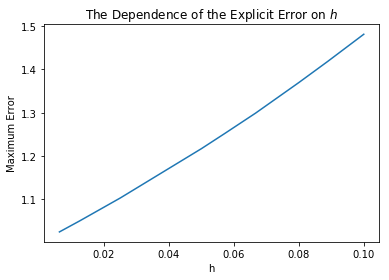

In [102]:
# Define initial conditions.
Tmax = 10
x0 = 0
v0 = 1

# Create an array of h's to check the error on.
h0 = 0.1
h_array = np.asarray([h0, h0/1.125, h0 / 1.25, h0 / 1.5, h0/1.75, h0/2., h0/4., h0/8., h0/16.])
max_err_list = np.zeros(len(h_array))

# For each h in the array, find the maximum error.
for i in range(len(h_array)):
    max_err_list[i] = (max_err(h_array[i], x0, v0, Tmax))

# Plot the maximum error against h.
plt.xlabel("h")
plt.ylabel("Maximum Error")
plt.plot(h_array, max_err_list, label="Error")
plt.title("The Dependence of the Explicit Error on $h$")
plt.savefig("h_err.png")
plt.show()


In [103]:
def energy(h, x0, v0, Tmax):    
    '''Given h, find the maximum possible value of the x error of the explicit
        method in an interval from 0 to Tmax.
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        t_list: List of t's.
        E_num: List representing the numerical energy.
        E_anal: List representing the analytic energy.
        E_error: List representing the numerical solution's energy error.
    '''
    
    # Find the explicit and analytic solutions.
    t_list, x_list, v_list  = spring_motion(h, x0, v0, Tmax)
    at_list, ax_list, av_list  = analytic_spring_motion(h, x0, v0, Tmax)
    
    # Calculate the energy associated with x and v.
    E_num = x_list**2. + v_list**2.
    E_anal = ax_list**2. + av_list**2.
    
    # Calculate the explicit method's error.
    E_err = E_num - E_anal
    
    # Return the t, energy, and error on energy.
    return t_list, E_num, E_anal, E_err

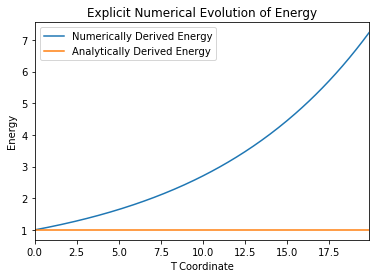

In [104]:
# Calculate the explicit method's energy.
t_list, E_num, E_anal, E_err = energy(0.1, x0, v0, 20)

# Plot the energy for the explicit and analytical methods.
plt.plot(t_list, E_num, label="Numerically Derived Energy")
plt.plot([t_list[0], t_list[-1]], [1, 1], label="Analytically Derived Energy")
plt.xlim([t_list[0], t_list[-1]])
plt.xlabel("T Coordinate")
plt.ylabel("Energy")
plt.title("Explicit Numerical Evolution of Energy")
plt.legend()
plt.savefig("exp_energy.png")
plt.show()

In [105]:
def implicit_spring_motion(h, x0, v0, Tmax):
    '''Generate a list of t, x, and v which describe the stepwise
    implicit Euler approximations of a spring's motion.  
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        t_list: A list of values of t associated with the other returned values.
        x_list: A list of x-values derived by the implicit Euler's method
        v_list: A list of v-values derived by the implicit Euler's method
        x_err: List of implicit error on x
        v_err: List of implicit error on v
        e_list: List of implicit energy
    '''
        
    # Generate list of x and v to describe motion.
    t_list = np.arange(0, Tmax, h)
    n_iter = len(t_list)
    
    x_list = np.zeros(n_iter)
    v_list = np.zeros(n_iter)
    
    current_x = x0
    current_v = v0
    
    for i in range(n_iter):
        x_list[i] = current_x
        v_list[i] = current_v
        
        current_x = (x_list[i] + h * v_list[i]) / (1. + h**2.)
        current_v = (v_list[i] - h * x_list[i]) / (1. + h**2.)
        
    # Generate list of analytically derived x and v 
    # to describe the approximation error.
    at_list, ax_list, av_list = analytic_spring_motion(h, x0, v0, Tmax)
    
    x_err = ax_list - x_list
    v_err = av_list - v_list
    
    # Calculate the energy for the implicitly derived spring motion.
    e_list = x_list**2. + v_list**2.
    
    return t_list, x_list, v_list, x_err, v_err, e_list

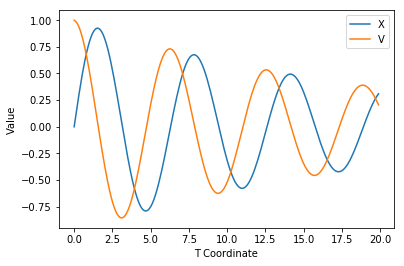

In [106]:
# Calculate the x, v, x error, v error, and energy of the implicit approximation.
ti_list, xi_list, vi_list, xi_err, vi_err, ei_list = implicit_spring_motion(0.1, 0, 1, 20)

# Plot the x and v of the implicit method.
plt.plot(ti_list, xi_list, label="X")
plt.plot(ti_list, vi_list, label="V")
plt.legend()
plt.xlabel("T Coordinate")
plt.ylabel("Value")
plt.savefig("impnumspring.png")
plt.show()

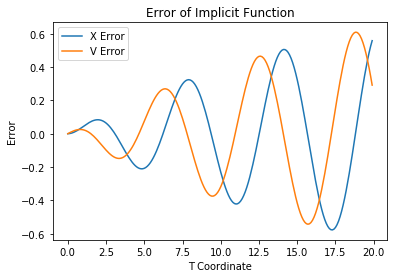

In [107]:
# Plot the implicit error.
plt.plot(ti_list, xi_err, label="X Error")
plt.plot(ti_list, vi_err, label="V Error")
plt.legend()
plt.title("Error of Implicit Function")
plt.xlabel("T Coordinate")
plt.ylabel("Error")
plt.savefig("imperrspring.png")
plt.show()

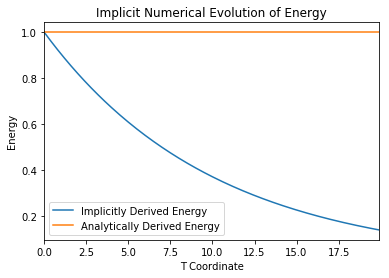

In [108]:
# Plot the implicit energy.
plt.plot(ti_list, ei_list, label="Implicitly Derived Energy")
plt.plot([ti_list[0], ti_list[-1]], [1, 1], label="Analytically Derived Energy")
plt.xlim([ti_list[0], ti_list[-1]])
plt.xlabel("T Coordinate")
plt.ylabel("Energy")
plt.title("Implicit Numerical Evolution of Energy")
plt.legend()
plt.savefig("imp_energy.png")
plt.show()

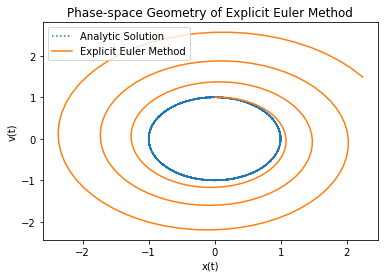

In [109]:
# Plot the phase-space geometry of the explicit euler method.
plt.title("Phase-space Geometry of Explicit Euler Method")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.plot(xa_list, va_list, ls='dotted', label="Analytic Solution")
plt.plot(x_list, v_list, label="Explicit Euler Method")
plt.legend()
plt.savefig("exp_pspace.png")
plt.show()

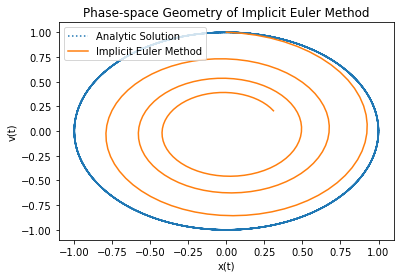

In [110]:
# Plot the phase-space geometry of the implicit euler method.
plt.title("Phase-space Geometry of Implicit Euler Method")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.plot(xa_list, va_list, ls='dotted', label="Analytic Solution")
plt.plot(xi_list, vi_list, label="Implicit Euler Method")
plt.legend(loc="upper left")
plt.savefig("imp_pspace.png")
plt.show()

In [79]:
def symplectic_spring_motion(h, x0, v0, Tmax):
    '''Generate a list of t, x, and v which describe the stepwise
    symplectic Euler approximations of a spring's motion.  
    
    Args:
        h: Step size
        x0: Initial x value
        v0: Initial v value
        Tmax: Maximum value of t
        
    Returns:
        t_list: A list of values of t associated with the other returned values.
        x_list: A list of x-values derived by the symplectic Euler's method
        v_list: A list of v-values derived by the symplectic Euler's method
        x_err: List of symplectic error on x
        v_err: List of symplectic error on v
        e_list: List of symplectic energy
    '''
    
    # Generate list of x and v to describe motion.   
    t_list = np.arange(0, Tmax, h)
    n_iter = len(t_list)
    
    x_list = np.zeros(n_iter)
    v_list = np.zeros(n_iter)
    
    current_x = x0
    current_v = v0
    
    for i in range(n_iter):
        x_list[i] = current_x
        v_list[i] = current_v
        
        current_x = current_x + h * current_v
        current_v = current_v - h * current_x       
                
    # Generate list of analytically derived x and v 
    # to describe the approximation error.
    at_list, ax_list, av_list = analytic_spring_motion(h, x0, v0, Tmax)
    
    x_err = ax_list - x_list
    v_err = av_list - v_list
    
    # Calculate the energy for the implicitly derived spring motion.
    e_list = x_list**2. + v_list**2.
    
    return t_list, x_list, v_list, x_err, v_err, e_list

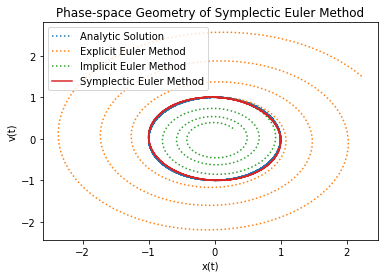

In [113]:
# Calculate the x, v, x error, v error, and energy of the symplectic approximation.
ts_list, xs_list, vs_list, xs_err, vs_err, es_list = symplectic_spring_motion(0.1, 0, 1, 20)

# Plot the phase space of the symplectic, implicit, and explicit methods.
plt.title("Phase-space Geometry of Symplectic Euler Method")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.plot(xa_list, va_list, ls='dotted', label="Analytic Solution")
plt.plot(x_list, v_list, ls='dotted', label="Explicit Euler Method")
plt.plot(xi_list, vi_list, ls='dotted', label="Implicit Euler Method")
plt.plot(xs_list, vs_list, label="Symplectic Euler Method")
plt.legend(loc="upper left")
plt.savefig("sym_pspace.png")
plt.show()

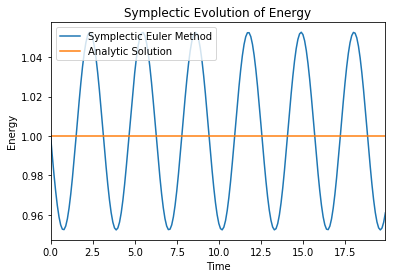

In [114]:
plt.title("Symplectic Evolution of Energy")
plt.ylabel("Energy")
plt.xlabel("Time")
plt.plot(ts_list, es_list, label="Symplectic Euler Method")
plt.plot([ts_list[0], ts_list[-1]], [1, 1], label="Analytic Solution")
plt.legend(loc="upper left")
plt.xlim(ts_list[0], ts_list[-1])
plt.savefig("sym_energy.png")
plt.show()

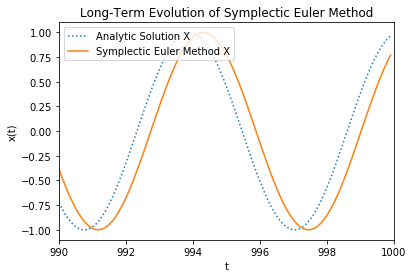

In [120]:
# Investigate long-term error evolution by plotting the symplectic
# approximation against the analytical derivation for large t.
ts_list_l, xs_list_l, vs_list_l, xs_err_l, vs_err_l, es_list_l = symplectic_spring_motion(0.1, 0, 1, 1000)
ta_list_l, xa_list_l, va_list_l = analytic_spring_motion(0.1, 0, 1, 1000)

# Plot results, restricting axis to focus on large t.
plt.title("Long-Term Evolution of Symplectic Euler Method")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.plot(ts_list_l, xs_list_l, ls='dotted', label="Analytic Solution X")
plt.plot(ta_list_l, xa_list_l, label="Symplectic Euler Method X")
plt.xlim(990, 1000)
plt.legend(loc="upper left")
plt.savefig("phase_err.png")
plt.show()